# Lesson 9
Functions and 'Apply'

# Problem 1
Load in tips.csv and make a plot of tips based on sex and based on time

In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
tips=Table().read_table('tips.csv')
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


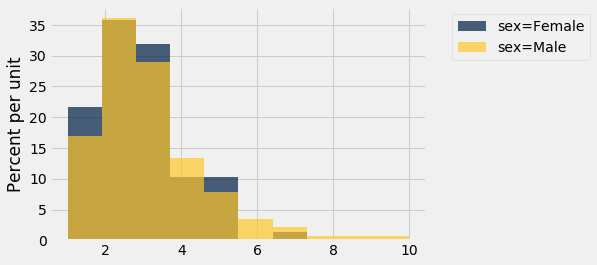

In [4]:
tips.select('tip', 'sex').hist('tip',group='sex')

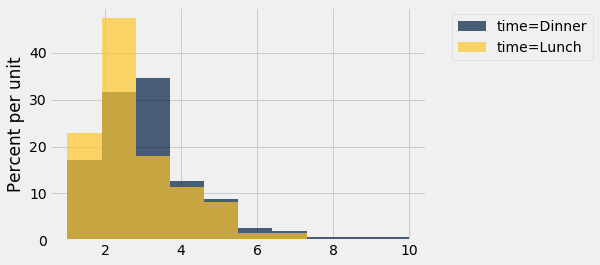

In [5]:
tips.select('tip', 'time').hist('tip',group='time')

# Problem 2
Create a function that converts days of the week to their numerical value

In [6]:
def weekday_to_num(wd):
    if wd == 'Mon':
        return 1
    if wd == 'Tues':
        return 2
    if wd == 'Wed':
        return 3
    if wd == 'Thur':
        return 4
    if wd == 'Fri':
        return 5
    if wd == 'Sat':
        return 6
    if wd == 'Sun':
        return 7

# Problem 3
Apply this to the tips table and replace the weekdays with their corresponding values

In [8]:
tips.with_column('Weekday num', tips.apply(weekday_to_num,'day')).drop('day')

total_bill,tip,sex,smoker,time,size,Weekday num
16.99,1.01,Female,No,Dinner,2,7
10.34,1.66,Male,No,Dinner,3,7
21.01,3.5,Male,No,Dinner,3,7
23.68,3.31,Male,No,Dinner,2,7
24.59,3.61,Female,No,Dinner,4,7
25.29,4.71,Male,No,Dinner,4,7
8.77,2,Male,No,Dinner,2,7
26.88,3.12,Male,No,Dinner,4,7
15.04,1.96,Male,No,Dinner,2,7
14.78,3.23,Male,No,Dinner,2,7


# Problem 4
Create a function that will estimate tips

In [17]:
def tip_est(bill):
    lb=bill-1
    ub=bill+1
    t=tips.where(0,are.between_or_equal_to(lb,ub)).column(1)
    return np.average(t)
### tips are estimated by finding bills within 1 dollar of the stated bill  
### amount and averaging the tips of those bills

# Problem 5
Apply this function to the total bill column and include this as a new column, also 
build a scatterlot overlayed with estimated tip and actual

In [23]:
tips=tips.with_column('Estimated tip', tips.apply(tip_est, 0))
tips

total_bill,tip,sex,smoker,day,time,size,Estimated tip
16.99,1.01,Female,No,Sun,Dinner,2,2.82437
10.34,1.66,Male,No,Sun,Dinner,3,1.81136
21.01,3.5,Male,No,Sun,Dinner,3,3.3425
23.68,3.31,Male,No,Sun,Dinner,2,3.33867
24.59,3.61,Female,No,Sun,Dinner,4,3.56267
25.29,4.71,Male,No,Sun,Dinner,4,4.19909
8.77,2,Male,No,Sun,Dinner,2,1.865
26.88,3.12,Male,No,Sun,Dinner,4,3.48111
15.04,1.96,Male,No,Sun,Dinner,2,2.41885
14.78,3.23,Male,No,Sun,Dinner,2,2.43833


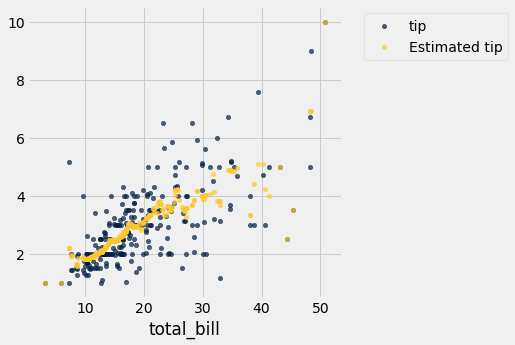

In [64]:
tips.scatter(0,[1,7])